# Chapter 12 - Simple Linear Regression and Correlation

In [1]:
# Useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.weightstats as sms
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.regressionplots import abline_plot
import statsmodels.api as sm
from statsmodels.api import qqplot
from scipy.stats import t
from scipy.stats import f
from scipy.stats import norm
import math
from IPython.display import Math, display

## The Simple Linear Regression Model

### Model Definition and Assumptions
The model can be defined as:
$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

- The observed $y_i$ is composed of a linear function $\beta_0 + \beta_1 x_i$ of the $x_i$ independent variable and an **error term** $\epsilon_i$.
- The error terms $\epsilon_1, \dots, \epsilon_n$ are generally taken from a $N(0, \sigma^2)$ distribution for some **error variance** $\sigma^2$
- This means that $y_1, \dots, y_n$ are observations from the independent random variables
$$Y_i \sim N(\beta_0 + \beta_1 x_i, \sigma^2)$$
- where 
    - $\beta_0$: intercept parameter
    - $\beta_1$: slope parameter
    - $\sigma^2$ can be estimated from the data set
    
- The smaller the error variance, the closer the values are to the line $y = \beta_0 + \beta_1x$

## Fitting the Regression Line

### Parameter Estimation
- Let $Q = \sum_{i=1}^b (y_i - \beta_0 - \beta_1 x_i)^2$
- We want to find the values $(\hat{\beta}_0, \hat{\beta}_1)$ called **least squares estimators** minimizing Q
- We have to solve
    - $\frac{ \partial Q}{\partial \beta_0} = 0$
    - $\frac{ \partial Q}{\partial \beta_1} = 0$
    
by which we get
$$\hat{\beta}_1 = \frac{ \sum_{i=1}^n (x_i - \overline x)(y_i - \overline y)}{ \sum_{i=1}^n (x_i - \overline x)^2} = \frac{S_{xy}}{S_{xx}}$$
$$\hat{\beta}_0 = \overline y - \hat{\beta}_1 x$$

Where
$$S_{xx} = \sum_{i=1}^n (x_i - \overline x)^2  = \sum_{i=1}^n x_i^2 - n \overline x^2$$
$$S_{yy} = \sum_{i=1}^n (y_i - \overline y)^2 = \sum_{i=1}^n y_i^2 - n \overline y^2$$
$$S_{xy} = \sum_{i=1}^n (x_i - \overline x)(y_i - \overline y) = \sum_{i=1}^n x_i y_i - n \overline x \overline y$$

The regression (fitted) line is:
$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$$

- Sum of squared errors (SSE):
$$SSE = \sum_{i=1}^n (y_i - \hat{y})^2$$
    - $E(SSE) = (n-2)\sigma^2$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     6.939
Date:                Fri, 04 Dec 2020   Prob (F-statistic):             0.0168
Time:                        18:04:39   Log-Likelihood:                -67.808
No. Observations:                  20   AIC:                             139.6
Df Residuals:                      18   BIC:                             141.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.2181      6.184      8.767      0.0

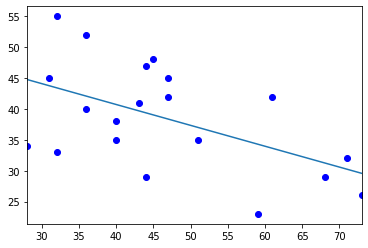

<IPython.core.display.Math object>

In [2]:
# Toy dataset
x = np.array([59, 47, 44, 32, 45, 61, 71, 
              32, 28, 36, 36, 51, 31, 44, 
              73, 47, 40, 43, 68, 40])
y = np.array([23, 45, 29, 55, 48, 42, 32, 
              33, 34, 52, 40, 35, 45, 47, 
              26, 42, 35, 41, 29, 38])

# Create dataframe
data = pd.DataFrame({'x':x, 'y':y})

# Data fitting
fit = ols('y~x', data).fit()
print(fit.summary())

# Plots
abline_plot(model_results=fit)
plt.plot(x, y, 'bo')
plt.show()

# Fitted coefficients
display(Math(r'\hat \beta_0: {:.4f} \\ \hat \beta_1: {:.4f}'.format(
    fit.params[0], fit.params[1])))

In [3]:
'''Example having the sums of x, y, x^2, y^2'''
# Parameters
n = 20
sum_x = 8.552
sum_y = 398.2
sum_x2 = 5.196
sum_y2 = 9356
sum_xy = 216.6

# Calculations
x_bar = sum_x / n
y_bar = sum_y / n
Sxx = (sum_xy - n * x_bar * y_bar); Sxy = (sum_x2 - n * x_bar ** 2)
beta_1 = Sxx / Sxy; beta_0 = y_bar - beta_1 * x_bar
SSE = sum_y2 - beta_0 * sum_y - beta_1 * sum_xy
sigma2 = SSE / (n - 2)

# Results
display(Math(r'\beta_0 = {:.4f}\\ \beta_1 = {:.4f}'.format(beta_0, beta_1)));
display(Math(r'SSE = {:.4f}\\ \sigma^2 = {:.4f}'.format(SSE, sigma2)));

# Prediction: if x = 0.5, how much is y?
x = 0.5; y = beta_0 + beta_1*x; print('y = {:.4f}'.format(y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

y = 22.0893


## Inferences on the Slope Parameter $\beta_1$

### Inference Procedures

- Let $\hat{\sigma}^2 = \frac{SSE}{n-2}$
- Under the assumption of the linear regression model we have:
$$\frac{SSE}{n-2} \sim \chi^2_{n-2}$$

- We can build the statistics as: $T = \frac{\hat{\beta}_1 - \beta_1}{\hat{\sigma} / \sqrt{S_{xx}}}$. Then
$$T \sim t_{n-2}$$

- $100(1-\alpha)$% confidence interval for $\beta_1$:
$$\hat{\beta}_1 \pm t_{\frac{\alpha}{2}, n-2} \frac{\hat{\sigma}}{\sqrt{S_{xx}}}$$

where the standard error is
$$s.e.(\hat{\beta}) = \frac{\hat{\sigma}}{\sqrt{S_{xx}}}$$

### $p$-values

We test $\beta_1$ and $\beta_{10}$ with the T statistics
$$T = \frac{\beta_1 - \beta_{10}}{\hat{\sigma} / \sqrt{S_{xx}}}$$

- Two-sided test $H_0: \beta_1 = \beta_{10}$ vs $H_A: \beta_1 \neq \beta_{10}$
    - $\Longrightarrow$ p-value = $2P(T > \mid obs(T) \mid )$
    
    
- One-sided test $H_0: \beta_1 \geq \beta_{10}$ vs $H_A: \beta_1 < \beta_{10}$
    - $\Longrightarrow$ p-value = $P(T < t)$
    - A size $\alpha$ test rejects $H_0$ if $t < -t_{\alpha, n-2}$
    
    
- One-sided test $H_0: \beta_1 \leq \beta_{10}$ vs $H_A: \beta_1 > \beta_{10}$
    - $\Longrightarrow$ p-value = $P(T > t)$
    - A size $\alpha$ test rejects $H_0$ if $t > t_{\alpha, n-2}$

- For a fixed value of the error variance $\sigma^2$, the variance of the slope parameter estimate decreases as the value of $S_{xx}$ increases $\Longrightarrow$ the more the values of $x$ are spread out, the more "leverage" they will have for fitting the regression line

In [4]:
# Parameters
n = 24
alpha = 0.01
beta_hat = 0.8051
se_beta = 0.0643 # Standard error
beta_10 = 0

# Calculations
df = n-2; critical = t.ppf(1-alpha/2, df)
left = beta_hat - critical * se_beta
right = beta_hat + critical * se_beta

# T-statistics
t_stat = (beta_hat - 0) / se_beta
p_value = t.sf(t_stat, df=df)

# Printing
print('Critical point: {:.4f}'.format(critical))
print('99% Confidence Interval: ({:.4f}, {:.4f})'.format(left, right))
print('p-value: {:.4f}'.format(2*p_value))

Critical point: 2.8188
99% Confidence Interval: (0.6239, 0.9863)
p-value: 0.0000


## Inferences on the Regression Line

### Inference Procedures
Inferences on the mean response at $x_0$, $E(Y_{x_0})$
- The T-statistics are as following:
$$T=\frac{ \hat{y}_{x_0} - \mu_{x_0} }{ \hat{\sigma} \sqrt{ \frac{1}{n} + \frac{ (x_0 -\bar{x})^2}{S_{xx}} }}$$
where
- $\hat{y}_{x_0} = \hat{\beta}_0 + \hat{\beta}_1 x_0$ and $\mu_{x_0} = E(Y_{x_0}) = \beta_0 + \beta_1 x_0$
Then
$$T \sim t_{n-2}$$

A $100(1-\alpha)$ confidence interval can be obtained as following:
$$\hat{y}_{x_0} \pm t_{\frac{\alpha}{2}, n-2} \hat{\sigma} \sqrt{ \frac{1}{n} + \frac{ (x_0 - \bar{x})^2 }{S_{xx}} }$$

In [5]:

# Parameters
n = 17; df = n-2
alpha = 0.05
beta_1 = 34.60; beta_0 = 12.08
x0 = 40; x_bar = 53.2
sigma2 = 17.65; Sxx = 1096

# Calculations
temp = math.sqrt(1/n + (x0 - x_bar)**2/Sxx)
sigma = math.sqrt(sigma2)
critical = t.ppf(1-alpha/2, df)
y_se = critical*sigma*temp
yhat_x0 = beta_0 + beta_1*x0 # Prediction
left = yhat_x0 - y_se; right = yhat_x0 + y_se

# Printing
print('Critical point: {:.4f}'.format(critical))
print('{:.0f}% Confidence Interval: ({:.2f}, {:.2f})'.format((1-alpha)*100, left, right))

Critical point: 2.1314
95% Confidence Interval: (1391.90, 1400.26)


## Prediction Intervals for Future Response Values

### Inference Procedures
- Predicition interval for a single response $Y_{x_0}^{new}$ at $x = x_0$
$$Y_{x_0}^{new} - \hat{y}_{x_0} \sim N \left( 0, \sigma \sqrt{ 1 + \frac{1}{n} + \frac{(x_0 - \overline x)^2}{S_{xx}}} ) \right)$$ 

- The T-statistics can be written as
$$T=\frac{ Y_{x_0}^{new} - \hat{y}_{x_0} }{ \hat{\sigma} \sqrt{ 1 + \frac{1}{n} + \frac{ (x_0 -\bar{x})^2}{S_{xx}} }}$$

- A $100(1-\alpha)$% prediction interval for a single response $Y_{x_0}^{new}$ can be obtained as:
$$\hat{y}_{x_0} \pm t_{\frac{\alpha}{2}, n-2} \hat{\sigma} \sqrt{1+ \frac{1}{n} + \frac{ (x_0 - \bar{x})^2 }{S_{xx}} }$$

In [6]:
# Parameters
n = 30; df = n-2
alpha = 0.05
beta_0 = 51.98; beta_1 = 3.44
x0 = 22 # New value
sum_x = 603.36; sum_x2 = 12578.22
res = 329.77

# Calculate x_bar
x_bar = sum_x/n

# Calculate Sxx
Sxx = sum_x2 - sum_x**2/(n)

# Calculate Sigma
sigma = math.sqrt(res/(n-2))

# Final calculations
temp = math.sqrt(1 + 1/n + (x0 - x_bar)**2/Sxx)
critical = t.ppf(1-alpha/2, df)
y_se = critical*sigma*temp
yhat_x0 = beta_0 + beta_1*x0 # Prediction
left = yhat_x0 - y_se
right = yhat_x0 + y_se

# Printing
print('Critical point: {:.4f}'.format(critical))
print('{:.0f}% Confidence Interval: ({:.2f}, {:.2f})'.format((1-alpha)*100, left, right))

Critical point: 2.0484
95% Confidence Interval: (120.49, 134.83)


## The Analysis of Variance Table

### Sum of Squared Decomposition
- Total sum of squares (SST)
$$SST = S_{yy} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \sum_{i=1}^n (\hat{y}_i - \overline y)^2 = SSE + SSR$$

### Analysis of Variance for Simple Linear Regression Analysis

| Source     | d.f.      | Sum of  Squares | Mean Squares          | F-statistic            | P-value                         |
|------------|-----------|-----------------|-----------------------|------------------------|---------------------------------|
| Treatments | $$1$$   | SSR           | $$MSR$$  | $$F=\frac{MSR}{MSE}$$ | $$P(F_{1,n -2} > F)$$ |
| Error      | $$n-2$$ | SSE             | $$MSE=SSE/(n-2)$$ |                        |                                 |
| Total      | $$n-1$$ | SST             |                       |                        |                                 |

### The Coefficient of Determination
$$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

### The sample correlation coefficient and the coefficient of determination

- The sample correlation coefficient is
$$r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}} = \hat{\beta}_1 \sqrt{ \frac{S_{xx}}{S_{yy}}}$$
$$\hat{\beta}_1^2 S_{xx} = \sum_{i=1}^n (\hat{\beta}_1 (x_i - \overline x))^2 = \sum_{i=1}^n (\hat{y}_i - \overline y)^2 = SSR$$

$\Longrightarrow r^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST} = R^2$ 

In [7]:
# Toy dataset
x = np.array([52, 68, 64, 88, 80, 75,
              59, 63, 85, 74, 71, 66])

y = np.array([64, 53, 58, 59, 49, 54,
              38, 48, 68, 63, 58, 47])

# Data processing
data = pd.DataFrame({'x': x, 'y': y})

# Fit the model
model = ols("y ~ x", data).fit()

# Print the summary
# print(model.summary())

# Anova table
anova_results = anova_lm(model)
print('\nANOVA results'); print(anova_results)

SSE = anova_results['sum_sq'][0]
SSR = anova_results['sum_sq'][1]

# Calculate R^2
R2 = SSE/(SSR+SSE); display(Math('R^2 = {:.4f}'.format(R2)))


ANOVA results
            df      sum_sq    mean_sq        F   PR(>F)
x          1.0   87.588894  87.588894  1.24535  0.29054
Residual  10.0  703.327773  70.332777      NaN      NaN


<IPython.core.display.Math object>

## Residual Analysis

### Residual Analysis Method
- The residuals are defined to be
$$e_i = y_i - \hat{y}_i, \; 1 \leq i \leq n$$

- That satisfy: $\sum_{i=1}^n e_i = 0$

- Residual analysis can be used to:
    - Identify outliers
        - For instance, outliers have a large *absolute value* $e_i$
    - Check if the fitted model is appropriate
    - Check if the error variance is constant
    - Check if the error terms are normally distributed
    


$$Var(e_i) = \left( 1 + \frac{1}{n} + \frac{ (x_i - \overline x)^2}{S_{xx}} \right) \sigma^2$$

The normal score of the $i$-th smallest residual is
$$\Phi^{-1} \left( \frac{i-\frac{3}{8}}{n + \frac{1}{4}} \right)$$

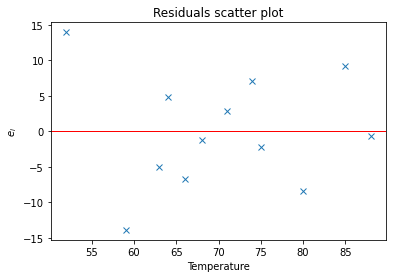

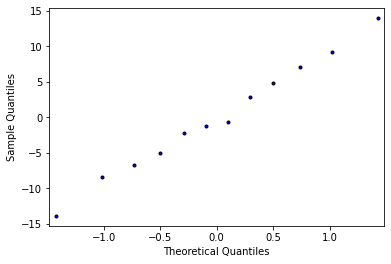

In [8]:
# Toy dataset
x = np.array([52, 68, 64, 88, 80, 75,
              59, 63, 85, 74, 71, 66])

y = np.array([64, 53, 58, 59, 49, 54,
              38, 48, 68, 63, 58, 47])

# Data processing
data = pd.DataFrame({'x': x, 'y': y})

# Fit the model
model = ols("y~x", data).fit()

# Obtain residuals
res = model.resid

# Plotting
# fig, ax = plt.figure(figsize=(10, 6))
plt.plot(x, res, 'x'); plt.xlabel(r'Temperature'); plt.ylabel(r'$e_i$')
plt.axhline(linewidth=1, color='r'); plt.title("Residuals scatter plot")
qqplot(res, color='black', markersize=3);

## Intrinsically Linear Models

- Models that can be linearized via transformations
- Example model:
$$M = \gamma_0 \theta^{\gamma_1}$$

$\Longrightarrow$ we can rewrite the model as:
$$ln(M) = ln(\gamma_0) + \gamma_1 ln(\theta)$$

<IPython.core.display.Math object>

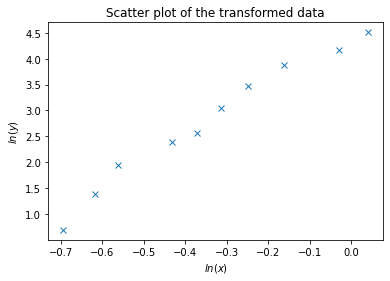

In [32]:
# Toy dataset
x = np.array([0.5, 0.54, 0.57, 0.65, 0.69,
              0.73,0.78, 0.85, 0.97, 1.04])

y = np.array([2, 4, 7, 11, 13, 21, 32, 48, 64, 91])

# Data processing
data = pd.DataFrame({'Pressure Differential': y, 'Cross-Sectional Area': x})

# We transform the data via a log transformation
x = np.log(x); y = np.log(y)

# Plot for showing the transformed data
plt.plot(x, y, 'x'); plt.xlabel(r'$ln(x)$')
plt.ylabel(r'$ln(y)$'); plt.title('Scatter plot of the transformed data')

# Data fitting
model = ols('y~x', data).fit()
display(Math(r'\beta_0 = {:.4f}\\ \beta_1 = {:.4f}'.format(model.params[0], model.params[1])))

## Correlation Analysis

### The Sample Correlation Coefficient

- Under the assumption that X and Y are jointly bivariate normal in distribution
- We test $H_0: \rho = 0$ versus $H_A: \rho \neq 0$, the test statistic is:
$$T = \frac{r \sqrt{n-2} }{\sqrt{1-r^2}} \sim t_{n-2} \text{ under }H_0$$

- The test is equivalent to testing $H_0: \beta_1 = 0$ vs $H_A: \beta_1 \neq 0$. In fact:
$$T = \frac{ \hat{\beta}_1 }{ s.e.(\hat{\beta}_1) } = \frac{ \hat{\beta}_1 }{\hat{\sigma} / \sqrt{S_{xx}} } = \frac{r \sqrt{n-2} }{\sqrt{1-r^2}}$$
where $r$ is the Pearson's correlation coefficient calculated as
$$r = \frac{ \sum (x_i - \overline x)(y_i - \overline y) }{ \sqrt{ \sum (x_i - \overline x)^2 \sum (y_i - \overline y)^2 } } = \frac{ cov(X, Y)}{ \sigma_X \sigma_Y} = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}} = \hat{\beta}_1 \sqrt{\frac{S_{xx}}{S_{yy}}}$$

- Recall that $SSR = \sum_i^n(\hat{y}_i - \overline y)^2 = \sum_i^n(\hat{\beta}_1(x_i - \overline x))^2 = \hat{\beta}_1^2 S_{xx}$

In [34]:
# Toy dataset
x = np.array([60, 61, 63, 63, 65, 65, 65, 66,
              68, 68, 69, 70, 70, 72, 72, 72,
              74, 75, 77, 77, 80, 80, 81, 81])

y = np.array([59.47, 63.43, 61.59, 62.44, 65.84,
              64.21, 66.87, 64.82, 68.93, 69.71, 
              69.80, 67.95, 71.14, 68.71, 71.64, 
              73.06, 70.73, 74.57, 70.86, 76.09,
              73.89, 78.39, 76.87, 81.53])

# Covariance
def cov(X, Y):
    x_bar = X.mean()
    y_bar = Y.mean()
    return sum( (X - x_bar)*(Y - y_bar) )

# Standard deviation
def sigma(X):
    x_bar = X.mean()
    return math.sqrt(sum( (X - x_bar)**2 ))

r = cov(x, y)/(sigma(x)*sigma(y))
print('Correlation coefficient (manual calculation): {:.4f}'.format(r))
print('Correlation coefficient (via Numpy): {:.4f}'.format(np.corrcoef(x, y)[0, 1]))

n = len(x)
t_stat_1 = r*math.sqrt(n - 2)/ math.sqrt(1 - r**2)
print('t-statistics with method: {:.4f}'.format(t_stat_1))

Correlation coefficient (manual calculation): 0.9365
Correlation coefficient (via Numpy): 0.9365
t-statistics with method: 12.5264
